<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/Equipo1_Proyecto_Equipo_1_MeanShiftpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

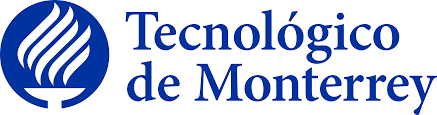

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 9.6 Comparación de métodos de segmentación (Demo en Google Colab)

#Clustering / Mean Shift



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

## **Introducción**


### **Segmentación**

La segmentación de imágenes es un paso importante en el procesamiento de imágenes y aparece en todas partes si queremos analizar qué hay dentro de la imagen. Por ejemplo, si buscamos saber si hay una silla o una persona dentro de una imagen interior, es posible que necesitemos una segmentación de imágenes para separar objetos y analizar cada objeto individualmente para comprobar de qué se trata. La segmentación de imágenes generalmente sirve como preprocesamiento antes del reconocimiento de patrones, la extracción de características y la compresión de la imagen.

La segmentación de imágenes es una técnica comúnmente utilizada en el procesamiento y análisis de imágenes digitales para dividir una imagen en varias partes o regiones. Usualmente este división se lleva acabo en función de las características de los píxeles de la imagen. En la segmentaciónm, la imagen queda dividida en diferentes regiones, de modo que cada región es homogénea, pero la unión de dos regiones adyacentes no lo es. 

Está técnica es un componente crítico y esencial para cualquier sistema de analisis de imagenes y reconociemiento de patrones. El algoritmo implementado para la segmentacion de imagenes determinara la calidad del resultado final del analisis. En este sentido, la segmentación es una de las tareas más dificiles dentro del procesamiento de imágenes. Por esto mismo, a lo largo de los años, se han desarrollado varios algoritmos y técnicas para la segmentación de imágenes utilizando conocimientos específicos del dominio para resolver de manera efectiva los problemas de segmentación en distintas areas de aplicacion específica. Estas aplicaciones incluyen:

* imágenes médicas
* conducción automatizada 
* videovigilancia 
* reconocimiento y detección facial
* procesamiento de imagenes satelitales
* entre otras aplicaciones de visión artificial.

Aunque son muchas las aplicaciones, el objetivo principal en todas es reducir la complejidad de la imagen y permitir un mayor procesamiento o análisis de cada segmento de la imagen. Técnicamente, la segmentación es la asignación de etiquetas a píxeles para identificar objetos, personas u otros elementos importantes en la imagen. El algoritmo de segmetnacion es una función que toma entradas de imagen y produce una salida. La salida es una máscara o una matriz con varios elementos que especifican la clase de objeto o la instancia a la que pertenece cada píxel.

Como se menciono, existen varias técnicas y tipos de segmentación entre las que destacan: 

1. Edge-based Segmentation
2. Threshold-based Segmentation
3. Region-based Segmentation}
4. **Cluster-based Segmentation**
5. Watershed Segmentation.

En este proyecto, se profundizará especificamente en una técinca de segmentación basade en Clusters conocida como Mean Shift











### **Mean Shift**



Mean Shift es un algoritmo de búsqueda que localiza de forma iterativa los modos en los datos maximizando la estimación de densidad del kernel (KDE), que es una forma de estimar la función de densidad de probabilidad de una variable aleatoria. KDE es un problema en el que las inferencias de la población se realizan mediante suavizado de datos. Funciona proporcionando pesos a cada punto de datos. La función de peso se llama núcleo. Hay muchos tipos de núcleos, un tipo de núcleo es el núcleo gaussiano. Al sumar todos esos núcleos, se crea una función de densidad (superficie de probabilidad). La variación de la función de densidad resultante depende del parámetro de ancho de banda utilizado.

Puede definirse como un algoritmo de aprendizaje no supervisado que se utiliza principalmente para la agrupación o Clustering. EL nombre de la técnica deriva del hecho de que en cada iteración del algoritmo hay un "desplazamiento de la media". Está técnica se usa ampliamente en el análisis de datos del mundo real  porque no es paramétrico y no requiere ninguna forma predefinida de los grupos en el espacio de características. Cómo se menciono con anterioridad, esta técnica es ampliamente utilizada en la segmentación de imágenes para su procesamiento o para aplicaciones de visión computacional.

En esta aplicación espécifica, el algoritmo lo que hace es que para cada píxel de una imagen (que tiene una ubicación espacial y un color particular), se determina el conjunto de píxeles vecinos (dentro de un radio espacial y una distancia de color definida). Para este conjunto de píxeles vecinos, se calculan el nuevo centro espacial (media espacial) y el nuevo valor medio de color. Estos valores medios calculados servirán como el nuevo centro para la próxima iteración. El procedimiento descrito se repetirá hasta que la media espacial y de color (o escala de grises) deje de cambiar. Al final de la iteración, el color medio final se asignará a la posición inicial de esa iteración.

En este sentido, el algoritmo de Mean Shift considera, usualmente, 3 variables de entrada:

* Una función  para medir distancias entre píxeles. Usualmente se utiliza la funcion de distancoia Euclediana. 
* Un radio. Todos los píxeles dentro de este radio (medido según la distancia anterior) se tendrán en cuenta para el cálculo.
* Una diferencia de valor. De todos los píxeles dentro del radio r, tomaremos solo aquellos cuyos valores estén dentro de esta diferencia para calcular la media.





Para entender mejor cómo funciona el método, vamos a explorar un data set que contiene dos variables de entrada como la que se muestra en la siguiente gráfica:

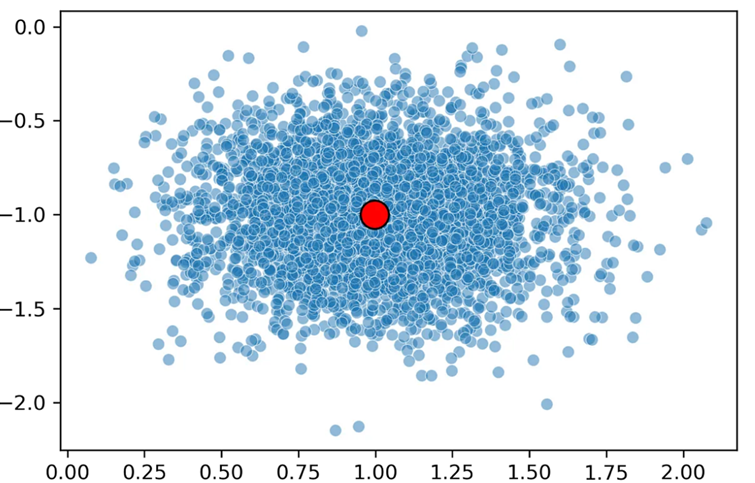

Podemos ubicar fácilmente la media aritmética de todo el conjunto de datos al calcular la media aritmética de cada una de las variables, la cual se ve gráficamente en el punto rojo. En este caso se asume que el peso de ambas variables es exactamente el mismo, sin embargo, también se puede considerar la media ponderada para cambiar el peso de cada una de las variables con la siguiente fórmula. 

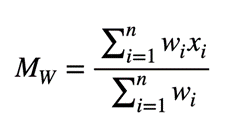

Donde Wi representa el peso de la variable Xi.


La variable que se debe de modificar manualmente en el método de Mean Shift es el tamaño del radio, a través del cual el método va a tomar la media de todos los puntos que estén considerados dentro del radio. Es decir, si queremos calcular la media ponderada para el área alrededor del punto O, que en realidad es cada uno de los pixeles de la imagen, una función de ponderación plana puede entenderse como un círculo de límite fijo centrado en O con radio R. Todo lo que esté dentro del círculo se contará y cualquier punto de datos fuera del círculo será ignorado, como podemos ver en la siguiente imagen donde nuevamente el punto negro es el pixel que estamos analizando, y el punto rojo es la media de todos los puntos que entraron dentro del círculo con radio R.

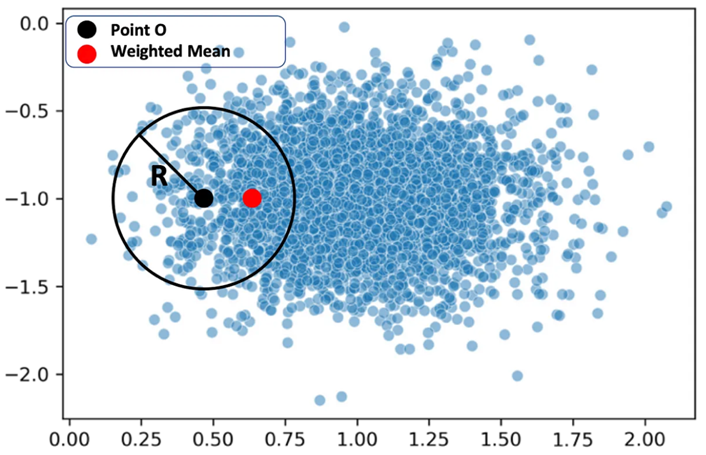

Aquí encontramos que el punto rojo tiende a ubicarse en una región con alta densidad de puntos. La idea de este proceso es repetir nuevamente la mecánica, con la diferencia de que la nueva iteración va a tener como punto central el punto rojo, es decir, la media del anterior círculo. Este proceso debe repetirse hasta que el punto rojo (media) y el punto negro (media previa) no se desplacen más de lo que previamente se tenga considerado. De esta manera, como podemos ver en la imagen, la idea es que cada pixel vaya tranzando un recorrido hasta el centro de su respectivo cluster.

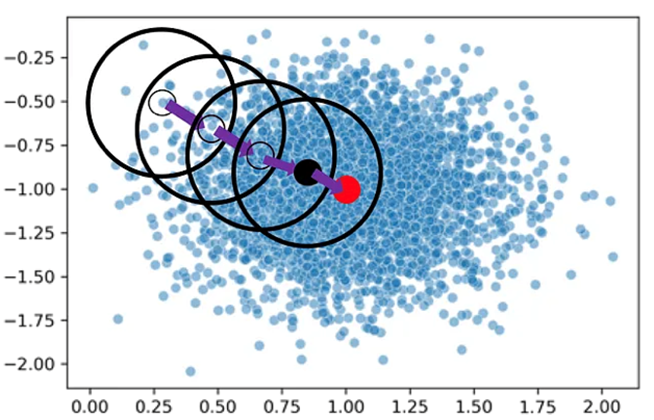

En la siguiente imagen, repetimos el proceso para cada pixel con un set de datos donde gráficamente se pueden anticipar 3 clústeres. Para cada cluster, se toman como ejemplo varios pixeles en donde trazamos con una línea negra el recorrido de la media para llegar al centro de cada clúster. Cada clúster está identificado con un color diferente. 

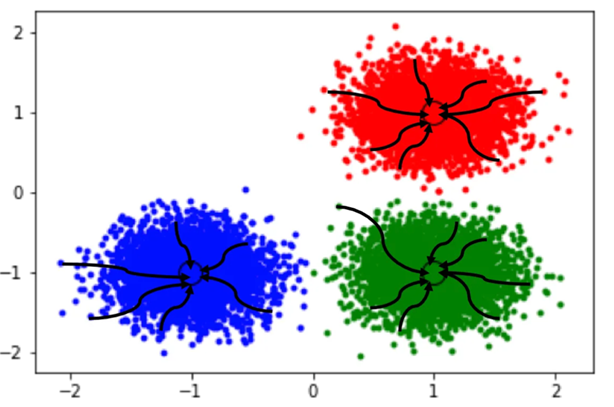


En resumen, se muestra que MS es un proceso de búsqueda de modo en una superficie construida con un núcleo de "sombra". Para los núcleos gaussianos, el cambio medio es un mapeo de gradiente. La convergencia se estudia para las iteraciones de desplazamiento medio. El análisis de conglomerados se trata como un problema determinista de encontrar un punto fijo de cambio medio que caracterice los datos. Se demuestran aplicaciones en agrupamiento y transformada de Hough. MS también se considera una estrategia evolutiva que realiza una optimización global multiinicio.

- Entre las fortalezas de los algoritmos de desplazamiento medio tenemos que no asume ninguna forma previa (por ejemplo, elíptica) en los grupos de datos y puede manejar espacios de características arbitrarios, a diferencia del algoritmo K-Means. El algoritmo no es sensible a los valores atípicos y la convergencia está garantizada. 

- Las debilidades del algoritmo Mean Shift incluyen la necesidad de usar un tamaño de ventana adaptativo porque un tamaño de ventana inadecuado puede hacer que los modos se fusionen, lo que da como resultado clústeres (segmentos) incorrectos. El tamaño de la ventana (selección del ancho de banda) no es trivial de elegir. El tamaño de ventana inadecuado puede hacer que los modos se fusionen o generar modos superficiales adicionales. Una limitación del procedimiento estándar de desplazamiento de la media es que no se especifica el valor del parámetro de ancho de banda.


## **Mean Shift - Código**

In [3]:
def MeanShiftFunc(img, quantile):

  # filter to reduce noise
  img = cv.medianBlur(img, 3)

  # flatten the image
  # The reshape method flattens the array to 225*225 rows by 3 columns in which the order is the 255 values of x for each value of y
  # y data dimension disappears and the reference flattens each 255 tuples is each y point
  
  flat_image = img.reshape((-1,3))
  flat_image = np.float32(flat_image)
  bandwidth = estimate_bandwidth(flat_image, quantile=quantile, n_samples=3000)
  ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
  ms.fit(flat_image)
  labeled=ms.labels_


  # get number of segments
  segments = np.unique(labeled)
  #print('Number of segments: ', segments.shape[0])

  # get the average color of each segment
  total = np.zeros((segments.shape[0], 3), dtype=float)
  count = np.zeros(total.shape, dtype=float)
  for i, label in enumerate(labeled):
      total[label] = total[label] + flat_image[i]
      count[label] += 1
  avg = total/count
  avg = np.uint8(avg)

  # cast the labeled image into the corresponding average color
  res = avg[labeled]
  result = res.reshape((img.shape))

  #show the result

  return (result, segments.shape[0])


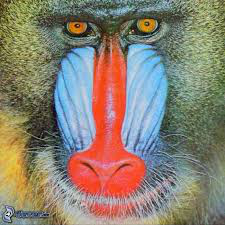

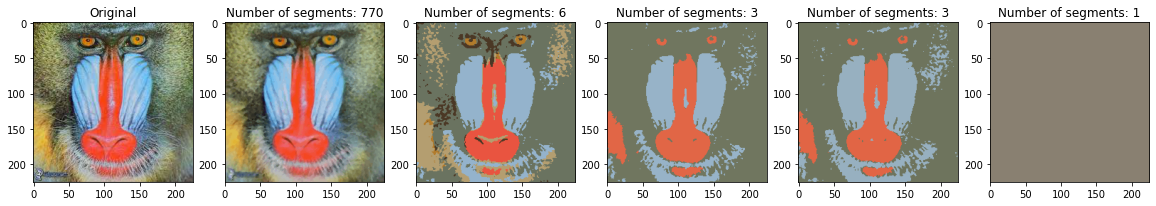

In [6]:
#img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/Proyecto/Chango Mean.PNG")
pathmono = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/mono.jpg?raw=true'
img = cv.cvtColor(io.imread(pathmono), cv.COLOR_BGR2RGB)

quantile_size = [0.002, 0.06, 0.12, 0.2, 0.3]

cv2_imshow(img)

# mean_image = MeanShiftFunc(img, 0.06)
# cv2_imshow(mean_image)


x = 1
plt.figure(figsize=(20, 20))
for qua_value in quantile_size:
  if x == 1:
    plt.subplot(1, len(quantile_size)+1, x)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) , plt.title("Original")
    x = x + 1
  mean_image, segment = MeanShiftFunc(img, qua_value)
  plt.subplot(1, len(quantile_size)+1, x)
  plt.imshow(cv.cvtColor(mean_image, cv.COLOR_BGR2RGB)) , plt.title("Number of segments: {}".format(segment))
  x = x + 1

In [14]:
img.shape

(225, 225, 3)

In [106]:
flat_image = img.reshape((-1,3))
for i in range(len(flat_image)):
  if flat_image[i].tolist() == img[1][0].tolist():
    print(f"First element of y = 1 is in position {i} in the flattened list")
  if flat_image[i].tolist() == img[1][224].tolist():
    print(f"Last  element of y = 1 is in position {i} in the flattened list\n")
  if flat_image[i].tolist() == img[2][0].tolist():
    print(f"First  element of y = 2 is in position {i} in the flattened list")
  else:
    continue

First element of y = 1 is in position 225 in the flattened list
Last  element of y = 1 is in position 449 in the flattened list

First  element of y = 2 is in position 450 in the flattened list


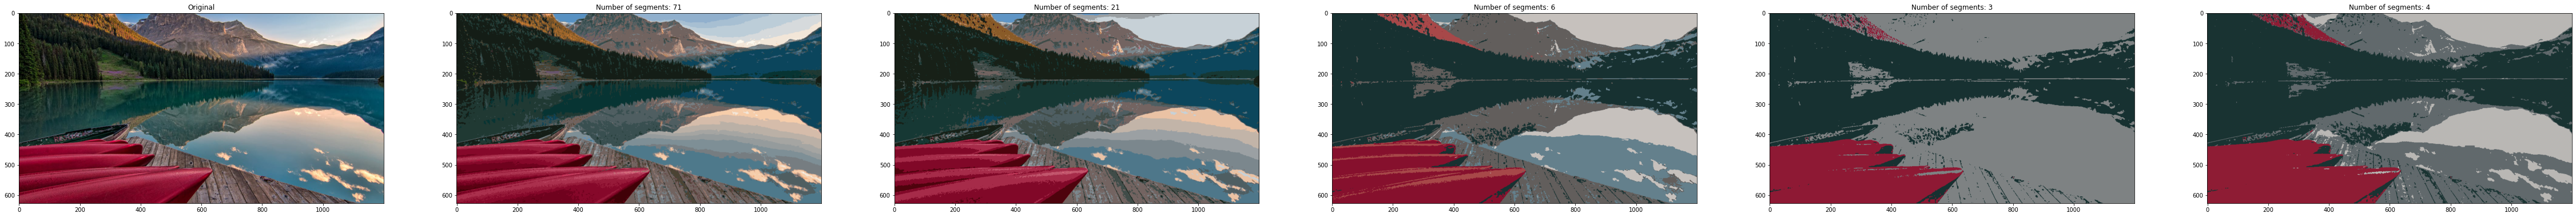

In [107]:
#img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/Proyecto/pexels-photo-1619317.jpeg")

path = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/pexels-photo-1619317.jpeg?raw=true'
img = cv.cvtColor(io.imread(path), cv.COLOR_BGR2RGB)


quantile_size = [0.0125, 0.0256 ,0.06, 0.12, 0.2]

# cv2_imshow(img)

# mean_image = MeanShiftFunc(img, 0.06)
# cv2_imshow(mean_image)


x = 1
plt.figure(figsize=(80, 100))
for qua_value in quantile_size:
  if x == 1:
    plt.subplot(1, len(quantile_size)+1, x)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) , plt.title("Original")
    x = x + 1
  mean_image, segment = MeanShiftFunc(img, qua_value)
  plt.subplot(1, len(quantile_size)+1, x)
  plt.imshow(cv.cvtColor(mean_image, cv.COLOR_BGR2RGB)) , plt.title("Number of segments: {}".format(segment))
  x = x + 1

#Referencias:

- Barthel, K. U. (2007, 12 13). Mean Shift Filter. Retrieved from https://imagej.nih.gov/ij/plugins/mean-shift.html#:~:text=Mean%20shift%20filtering%20is%20a,defined%20color%20distance)%20is%20determined
- datagen. (2023). Image Segmentation: The Basics and 5 Key Techniques. Obtenido de https://datagen.tech/guides/image-annotation/image-segmentation/
-	D. Comaniciu, V. Ramesh, and P. Meer, “The Variable Bandwidth Mean Shift and Data-Driven Scale Selection” Proc Eighth Int'l Conf. Computer Vision, vol.I, pp.438-445, July2001. 
-	F. Meng, H. Liu, Y. Liang, L. Wei, and J. Pei, A bidirectional adaptive bandwidth mean shift strategy for clustering, in IEEE International Conference on Image Processing (ICIP), 2017, pp. 2448–2452. http://doi.org/10.1109/icip.2017.8296722. 
- H.D. Cheng; X.H. Jiang; Y. Sun; Jingli Wang (2001). Color image segmentation: advances and prospects. , 34(12), 2259–2281.         doi:10.1016/s0031-3203(00)00149-7  
-	K. Jain. Data clustering: 50 years beyond k-means. Pattern Recognition Letters, 31:651–666, 2010. 
-	K. Huang, X. Fu, and N.D. Sidiropoulos, On Convergence of Epanechnikov Mean Shift, arXiv preprint arXiv:1711.07441, (2017). https://arxiv.org/abs/1711.07441. 
-	M.A. Carreira-Perpinán, A review of mean-shift algorithms for clustering, arXiv preprint arXiv:1503.00687, (2015). https://arxiv.org/abs/1503.00687. 
- MathWorks. (2023). What Is Image Segmentation? Obtenido de https://www.mathworks.com/discovery/image-segmentation.html#:~:text=Image%20segmentation%20is%20a%20commonly,the%20pixels%20in%20the%20image.
- Stackoverflow. (2017). Image Segmentation using Mean Shift explained. Retrieved from https://stackoverflow.com/questions/4831813/image-segmentation-using-mean-shift-explained
-	O. Tuzel, F. Porikli, and P. Meer. Kernel methods for weakly supervised mean shift clustering. In ICCV, pages 48–55, 2009.
- TensorFlow. (2023). https://www.tensorflow.org/tutorials/images/segmentation?hl=en. Obtenido de https://www.tensorflow.org/tutorials/images/segmentation?hl=en 
- Yufeng. (2022, 02 22). Understanding Mean Shift Clustering and Implementation with Python. Retrieved from https://towardsdatascience.com/understanding-mean-shift-clustering-and-implementation-with-python-
